[Back to Assignment 5](_Oving5.ipynb)
# Solving ODEs and plotting

In this asignment you will be using a numerical method to solve ODEs of the form 
$$\dot{y} = f(y)$$ 
You will also learn how to do some basic plotting with $\texttt{matplotlib.pyplot}$ 

## 1 Forward Euler method
The forward Euler method is 
$$y_{n+1} = y_n + \Delta t f(y_n),$$

where $y_n$ is the numerical approximation to exact solution $y(t_n)$ at time $t_n = n \Delta t$, and $\Delta t<<1$ is a small time step. 


First, let's consider the ODE
$$\dot{y} = - \lambda y$$
where $\lambda$ is a positive constant. The following code can be used to solve the above ODE using the forward Euler method. At each time-step, the code prints what time we are at $t_n$ and the value of the solution at that time $y_n$. 

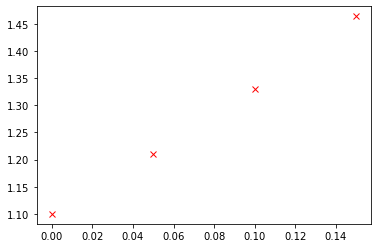

In [6]:
# This is where you write the code for task 1a) and 1b)

lam = 2           # lambda
dt  = 0.05        # time step
T   = 0.2         # total integration time 
nt  = round(T/dt) # total number of time steps
y   = 1           # initial conditions 

# (1a) Write a function here
def f(y):
    return -lam*y

for it in range(0,nt):
    y = y - dt*f(y) # (1a) Your function should go here! 
    plt.plot(it*dt, y, 'rx')



## a) 
The above code is specifically written for the ODE $\dot{y} = f(y)$, where $f(y) = -\lambda y$. Your first task is to re-write the above code using a function for $f(y)$. That is, write a function that takes the value $y_n$ and returns $-\lambda y_n$ and incorporate it into the above code. (There are hints in the code!)

## b)

The above code prints the values for $t_n$ and $y_n$ at each time step. While printing is an acceptable way to see what your code is doing, an even better way is to visualise the solution using a plot. The following code plots the points $(t,t^2)$ for $t = 1,2,3,4,5$. Replace the print statement in the above code with some code that plots the points $(t_n,y_n)$. 

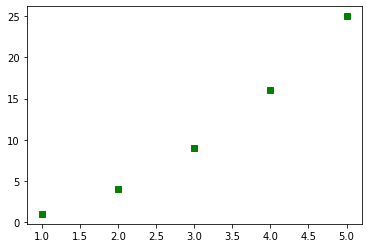

In [2]:
import matplotlib.pyplot as plt
for i in [1,2,3,4,5]:
    plt.plot(i,i**2,'gs') #  Note that the 'gs' here specifies is the marker type, i.e., a green square. You can try other marker types such as 'rx', 'bs' etc. 

## c)  
Use the forward Euler method to solve the following ODE and plot the solution. $$\dot{y} = (y-3)(y+1)$$ Plot the solution over the time interval $t\in[0,2]$ using the initial conditions $y_0 = 2$ and with a time step of $\Delta t = 0.05$. What value does the solution converge to? 

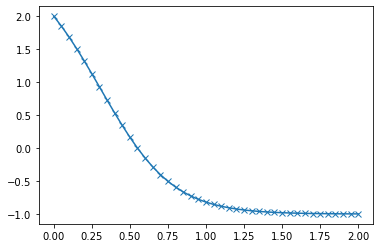

In [34]:
dt  = 0.05        # time step
T   = 2         # total integration time 
nt  = round(T/dt) # total number of time steps
y0   = 2           # initial conditions 


def f(y):
    return (y-3)*(y+1)

def fEuler(T, dt, y0, func):
    y = np.zeros(nt+1)
    y[0] = y0
    
    for i in range(nt):
        y[i+1] = y[i]+dt*func(y[i])
    
    return y

t = np.linspace(0,T,nt+1)
plt.plot(t, fEuler(T, dt, y0, f), 'x-')


# 2 Backward Euler method
In this exercise we will use the backward Euler method to solve ODEs. Recall that the backward Euler method is 
$$y_{n+1} = y_n + \Delta t f(y_{n+1})$$
and hence $y_{n+1}$ can be found by solving for the root of the non-linear implicit algebraic equation $$g(y_{n+1}) := y_n + \Delta t f(y_{n+1}) - y_{n+1} = 0$$
You can solve for $y_{n+1}$ using Newton's method, which is what we will do. 
Additionally, the derivative of $g(y_{n+1})$ is given by 
$$g'(y_{n+1}) = \frac{\mathrm{d} g(y_{n+1})}{\mathrm{d} y_{n+1}} = \Delta t \frac{\mathrm{d} f(y_{n+1})}{\mathrm{d} y_{n+1}} -1$$


The following code uses the backward Euler method to solve the ODE$$\dot{y} = - \lambda y.$$ In the following questions, you will modify this code to solve the ODE $$\dot{y} = (y-3)(y+1).$$

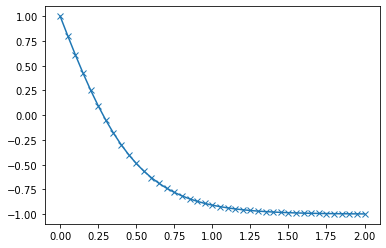

In [53]:
import numpy as np


lam = 2           # lambda
dt  = 0.05        # time step
T   = 2         # total integration time 
nt  = round(T/dt) # total number of time steps
y   = 1           # initial conditions 

# (2a) write functions for f, g, df, and dg here 
def f(y):
    return (y-3)*(y+1)

def df(y):
    return (y-3)+(y+1)

def g(y0,y1): 
    # solving this for y1 gives is the B.E. method
    return y0 + dt*f(y1) - y1

def dg(y0,y1):
    return dt*df(y1) - 1

def newton(y,g,dg):
    # newtons method for g(y0,y1)
    tol = 1e-15 # tolerance
    kmax = 100 # max number of iterations
    k = 1
    
    yn = y
    
    while abs(g(yn,y))>tol and k<kmax:
        y = y - g(yn,y)/dg(yn,y)
        k += 1 
    
    if k==100 or abs(g(yn,y))>tol:
        print('Warning! Newton\'s method didn\'t converge! ')
        return np.nan
    return y

y = np.zeros(nt+1) # Creating initial conditions and initializing y array
y[0] = 1

for i in range(nt):
    y[i+1] = newton(y[i],g,dg)

t = np.linspace(0,T,nt+1)

plt.plot(t,y,'x-')

# a) 
Write functions for $f(y)$, $f'(y)$, $g(y_{n+1})$, $g'(y_{n+1})$. Note that $g'(y_{n+1})$ also needs the derivative of $f(y_{n+1})$, which is $f'(y_{n+1}) = (y_{n+1}-3)+(y_{n+1}+1)$.

## b)
Using the backward Euler method with Newton iterations, plot the solution for the initial conditions $y_0 = 2$ and with a time step of $\Delta t = 0.05$.  

Hint: The following code uses Newton iterations to find a root of a function $g(y)$.

In [44]:
import numpy

def newton(y,g,dg):
    # use Newton iterations to solve the scalar function g(y) = 0
    # INPUT: 
    # y  - initial guess (float)
    # g  - function we are solving (function)
    # dg - derivative of the function g (function)
    # OUTPUT:
    # y - the solution to g(y) = 0 to within tol
    # if the Newton iterations do not converge then it will print an error message and return nan (not a number)
    
    k = 0 
    kmax = 100    # max iterations
    tol = 1e-10   # tolerance
    
    while abs(g(y))>tol and k<kmax:
        if abs(dg(y))>1e-14:       # if dg(y) is not zero 
            y = y - g(y)/dg(y)     # Newton iteration 
            k = k + 1
        elif abs(dg(y))<1e-14:     # if dg(y) is nearly zero
            k = kmax               # exit loop
        
    if k == kmax and abs(g(y))>tol: 
        print('Warning! Newton iterations did not converge :(')
        return numpy.nan
    else:
        return y


In [45]:
# Example of use:
def g(y): # some function that we want to find the root of
    return (y-2)*(y+5)
def dg(y): # the derivative of g(y)
    return (y-2)+(y+5)

y1 = 4 # intial guesses
y2 = -3
y3 = -3/2 # Note: dg(y3) = 0 so Newton iterations won't converge for this initial guess

root1 = newton(y1,g,dg)
print("root1 = %.2f" % root1)

root2 = newton(y2,g,dg)
print("root2 = %.2f" % root2)

root3 = newton(y3,g,dg)
print("root3 = %.2f\n\nnote that we converged to different roots based on the initial guess!" % root3)  

root1 = 2.00
root2 = -5.00
Warning! Newton iterations did not converge :(
root3 = nan

note that we converged to different roots based on the initial guess!


## c)
We have been using $y_n$ as your initial guess for the Newton iterations, however you may notice that for some (larger) times-steps that the Newton iterations don't converge (e.g., try your code for $\Delta t = 0.5$). In this case you could use a forward Euler step as an initial guess, that is instead of  $\texttt{ newton(y, g, dg)}$, you can use  $ \texttt{ newton(y+dt*f(y), g, dg)}$. Why is this a better initial guess for the Newton iteration? 

Because otherwise you get stuck whilst looking for a specific root. You want the method to converge to the solution.

## d) 
We now have two programs that solve the ODE $$\dot{y} = (y-3)(y+1),$$
one that uses the forward Euler method and one using the Backward Euler method. You may have noticed that the backward Euler method is harder to implement and may be wondering what is the point of using an implicit method if you have to solve a non-linear equation at each iteration.

Your last task is to run both programmes with larger and larger time steps and tell us your observations. Out of the forward and backward Euler methods, which one is better at larger $\Delta t$ ? (For example, $\Delta t > 0.5$ is large enough)

Hint: you may have to use a forward Euler step as the intitial guess for the Newton iterations as explained in the previous question. 

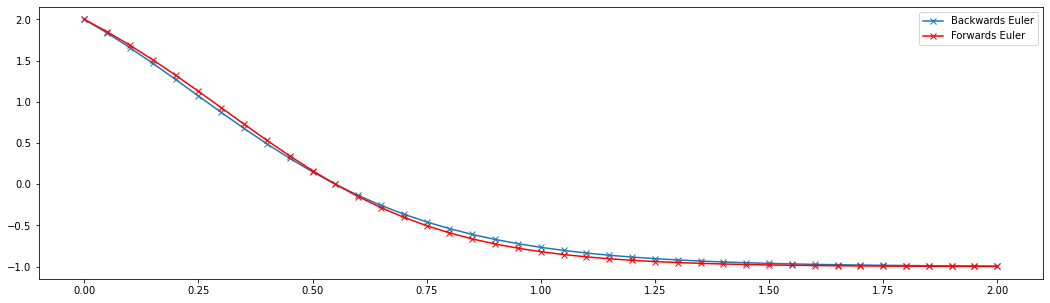

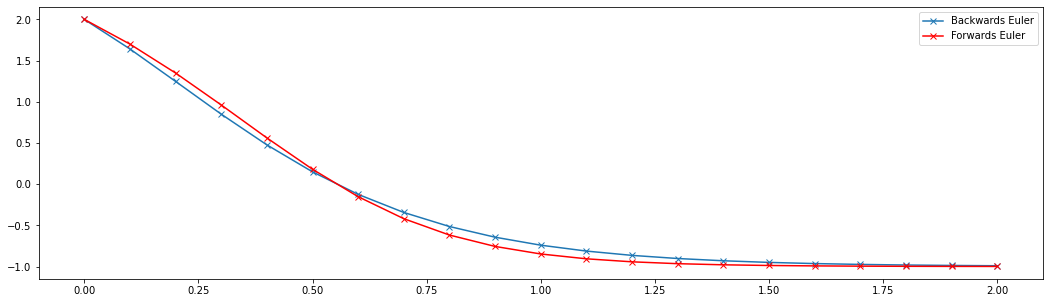

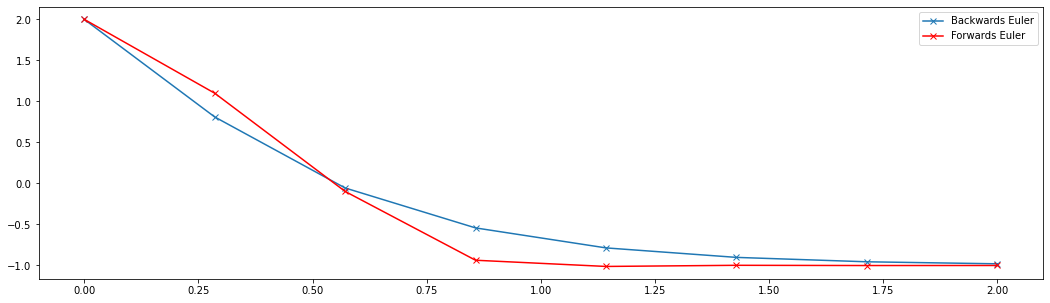

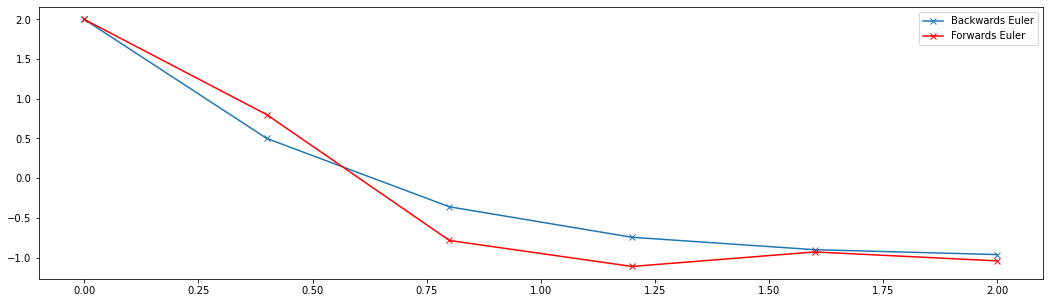

In [100]:
dt  = 0.05        # time step
T   = 2         # total integration time 
y0   = 2           # initial conditions 
nt = round(T/dt)

def bEuler(T, dt, y0, func, dfunc):
    
    nt = round(T/dt)
    yb = np.zeros(nt+1)
    yb[0] = y0
    
    for i in range(nt):
        yb[i+1] = newton(yb[i],func,dfunc)
    
    return yb

t = np.linspace(0,T,nt+1)
plt.figure(1, figsize = (18,5))
plt.plot(t,bEuler(T, dt, y0, g, dg),'x-', label = 'Backwards Euler')
plt.plot(t, fEuler(T, dt, y0, f), 'x-r', label = 'Forwards Euler')
plt.legend()

dt = 0.1
nt = round(T/dt)
t = np.linspace(0,T,nt+1)
plt.figure(2, figsize = (18,5))
plt.plot(t, bEuler(T, dt, y0, g, dg),'x-', label = 'Backwards Euler')
plt.plot(t, fEuler(T, dt, y0, f), 'x-r', label = 'Forwards Euler')
plt.legend()

dt = 0.3
nt = round(T/dt)
t = np.linspace(0,T,nt+1)
plt.figure(3, figsize = (18,5))
plt.plot(t,bEuler(T, dt, y0, g, dg),'x-', label = 'Backwards Euler')
plt.plot(t, fEuler(T, dt, y0, f), 'x-r', label = 'Forwards Euler')
plt.legend()

dt = 0.4
nt = round(T/dt)
t = np.linspace(0,T,nt+1)
plt.figure(4, figsize = (18,5))
plt.plot(t,bEuler(T, dt, y0, g, dg),'x-', label = 'Backwards Euler')
plt.plot(t, fEuler(T, dt, y0, f), 'x-r', label = 'Forwards Euler')
plt.legend()